In [2]:
import numpy as np

In [3]:
# Number of qubits.
N = 4

L = N // 2 # Length of half cut number of qubits.


In [4]:
Target_state = '0' * N

file1 = open('matrix_v'+Target_state+'.txt', 'r')

Lines = file1.readlines()
l = []
for line in Lines:
    l.append(line.strip())

In [5]:
# loop excludes the last one.
All_Psi = []
for i in range(0,len(l)-2**N+1,2**N):
    Psi = []
    for j in range(i,i+2**N):
        Psi.append(complex(l[j]))
    All_Psi.append(Psi)
len(All_Psi)

304

In [6]:


'''
    The following function takes a wavefunction as input and returns its entropy.

'''

def Entropy(Wavefunction):




    # Converting the list to a numpy matrix.
    Psi = np.matrix(Wavefunction).reshape(len(Wavefunction),1) # Psi column matrix.

    # Normalizing Psi.
    Psi = Psi/np.linalg.norm(Psi)


      
    
    def psi(s):
        return Psi[(2**L)*s:(2**L)*s + 2**L]   
    
      
    '''
        psi(s_p) is a row matrix/vector. psi(s) is a column matrix/vector.      
        Dimension of rhoA is N/2 x N/2. 
        The element <s|rhoA|sp> is given by psi_sp^\dagger * psi_s.
        
    ''' 

    def rhoA(s,s_p): # <s|rho_A|s_p>

        # psi(s_p)^\dagger * psi(s) is the element of (s,s_p) of rho_AB.  
        return psi(s_p).getH() * psi(s)
    
    
    
    def rhoA_Matrix(N):
    
        M = np.zeros((N,N), dtype = complex) # 0 to N-1.
    
        '''
            rho is Hermitian, it is sufficient to calculate the elements above the diagonal.
            The the elements below the diagonal can be replace by the complex cpnjugate of the
            elements above the diagonal.
        '''
        for i in range(N):
            for j in range(N):
            
                if i <= j : # Above the diagonal (i,j) i<j.
                
                    M[i,j] = rhoA(i,j)[0,0]
                
                else: # Below the diagonal (i,j) i>j.
                
                    M[i,j] = np.conjugate(M[j,i])
        return M    
    
    
    '''
        w is the diagonal of the diagonalized matrix rhoA.

    '''
    
    w, v = np.linalg.eig(rhoA_Matrix(N))
    
    w = w.real

    '''
        The following loop calculates S = - sum \lamba_i * log(\lambda_i).

    '''
    
    DL = np.zeros(N) # Creating an array for log w with zeros.
    
    for i in range(len(w)):
    
        if abs(w[i]) < 1.e-8: # log of zero gives nan.
        
            pass # Leave the log(zero) element as zero.
    
        else:
        
            DL[i] = np.log(w[i])
        
    # Entropy = -Tr(rho * log(rho)).        
    return -sum(w*DL)

In [7]:


def Bin2Dec(BinaryNumber): # Converts binary to decimal numbers.
    return int(str(BinaryNumber),2)


def Dec2Bin(DecimalNumber): # Converts decimal to binary numbers.
    return bin(DecimalNumber).replace("0b", "")



List = [i for i in range(2**N)] 


'''
The following function converts all numbers in decimals in the above list  from 0 to 2^N -1 to binary.

''' 
def List_Bin(List):
    
    l = []
    
    for i in List:
        
        i_Bin = Dec2Bin(i)
              
        
        '''
        While converting numbers from decimal to binary, for example, 1 is mapped to 1, to make sure that
        every numbers have N qubits in them, the following loop adds leading zeros to make the
        length of the binary string equal to N. Now, 1 is mapped to 000.....1 (string of length N).
        
        '''
        
        while len(i_Bin) < N: 
            
            i_Bin = '0'+i_Bin # This loop adds leading zeros.
            
        l.append(i_Bin)
        
    return l





'''
    The following function takes a binary string as input and rolls the qubits by one and
    returns the rolled string.

'''

def Roll_String(Binary_String):
    
    return Binary_String[-1] + Binary_String[:-1]







'''
    The following function takes a wavefunction as input and performs one roll on the qubits and
    returns the resultant wavefunction.

'''

def Psi_Roll(Inital_Psi):
    
    
    
    '''
        The following list contains all possible 2^N qubits after one roll is performed on them.
        For example, the first position 0001 is changed to 1000.
    
    '''
    
    Rl = [Roll_String(i) for i in List_Bin(List)] # Rolls every string in the list List by one qubit.

   

    
    ''' 
        The following list contains the previous list but in decimal numbers. For example,
        for N =4, the first position 1 is changed to 8.
        
    
    '''
    
    Rl_d = [Bin2Dec(i) for i in Rl] # Converts the rolled binary string to decimal number.


    '''
        The following loop rearranges the coefficients of Psi after rolling. For example, for N = 4,
        if the first coefficient 0001 is mapped to the eighth coefficient 1000 after one rotation of
        the qubits. The coefficient of the rolled Psi in the i ^ th position is in the Rl_d[i] ^ th positon
        of the initial Psi.
    
    '''
    
    
    Psi_Rolled = []

    for i in range(2**N): 
    
        Psi_Rolled.append(Inital_Psi[Rl_d[i]]) # Rearranging the coefficients according to the list l_d.
        
    return Psi_Rolled






'''
    The following function performs specified number of rolls Num on the qubits.

'''

def N_Rolled(Num, Initial_Psi): # Use loop only for postive N.
    
    s = Psi_Roll(Initial_Psi) # One roll.
    
    for i in range(Num-1): # Loop performing remaining N-1 rolls.
        
        s = Psi_Roll(s)
        
    return np.matrix(s).reshape(2**N,1) # Returning the rolled wavefunction as a matrix.

In [12]:
entropy_V = open('entropy_V.txt','w')

In [13]:
entropy_V = open('entropy_V.txt','a')

# Number of V matrix.
Num_V = int(len(l)/2**N)

for i in range(Num_V):
    entropy_V.write(str(Entropy(All_Psi[i]))+'\n')
    #print(Entropy(All_Psi[i])) # no roll
    #print(Entropy(N_Rolled(0,All_Psi[i])))

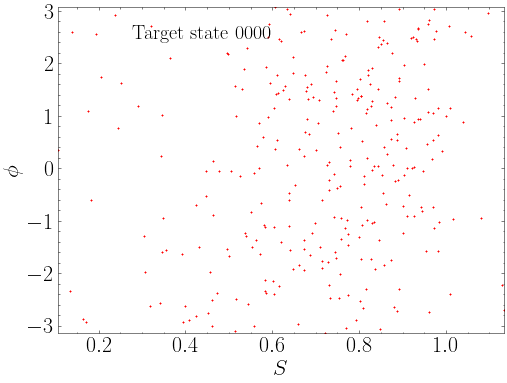

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

X = np.loadtxt('entropy_V.txt', delimiter = ',', unpack=True)
Y = np.loadtxt('phi_F.txt', delimiter = ',', unpack=True)

pparam = dict(xlabel='$S$', ylabel='$\phi$')

#x = np.linspace(0.75, 1.25, 201)
label = 'Target state 0000'
with plt.style.context(['science' ]):

    fig, ax = plt.subplots(figsize=(8, 6))
    #ax.plot(X, Y, label='Phi vs epsilon')
    ax.scatter(X, Y,s=4, c='r', marker ='+',label= label)
    ax.legend(loc='best', prop={'size': 20})
    ax.autoscale(tight=True)
    ax.set(**pparam)
    plt.show()
    #fig.savefig(data_set+'.pdf')
    fig.savefig('fig1.jpg', dpi=600)